In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import io
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [2]:
#import first dataset and visualize it

df = pd.read_csv('Covid19-vaccination.csv')
print(df.shape)
df.head()

(63006, 16)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [3]:
#check how many missing values each column has

df.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

In [4]:
#drop datapoints with missing values since they are useless

df = df.drop(df[df.total_vaccinations.isna()].index)
print(df.shape)
df.isna().sum()

(35729, 16)


location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

In [5]:
#create new df without missing values

check_df = df.drop(df[df.people_vaccinated.isna()].index)
print(check_df.shape)
check_df.head()

(33850, 16)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


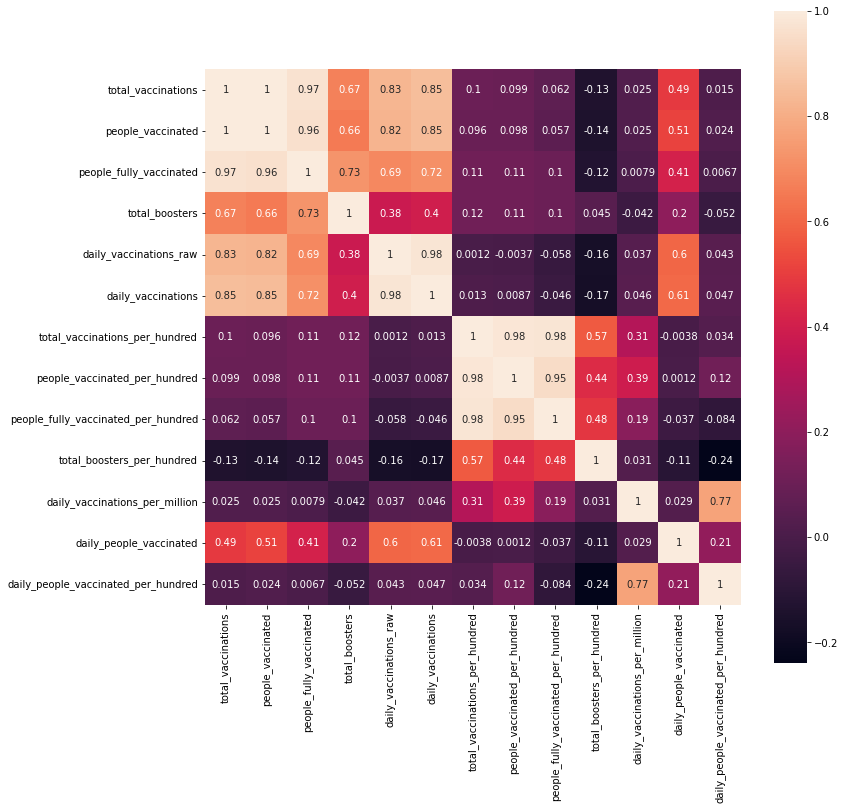

In [6]:
#visualize correlation between datasets. 

#seems like people vaccinated has correlation of 1 and they appear to be the same

plt.subplots(figsize=(12, 12))
sns.heatmap(check_df.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

In [7]:
# replace df values with 0 if nan is due to 0 people being vaccinated/dead/etc. at a certain point

df.people_vaccinated = df.people_vaccinated.fillna(0) #this should not be replaced with zeros. In the project, you need to fill with the appropriate numbers (see hint). 
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
#df.isna().sum()

In [8]:
#people_fully_vaccinated has 0.97 correlation to total_vaccinations so we can just fill in acordingly
#total booster na values should just be the average of the future day and previous day

In [9]:
#dataclean same way as cell above

inds = np.array(check_df.index)
for i in inds:
    check_df.people_fully_vaccinated[i] = check_df.total_vaccinations[i]
check_df.total_boosters = df.total_boosters.fillna(0)
check_df.daily_vaccinations_raw = check_df.daily_vaccinations_raw.fillna(0)
check_df.daily_vaccinations = check_df.daily_vaccinations.fillna(0)
check_df.total_boosters_per_hundred = check_df.total_boosters_per_hundred.fillna(0)
check_df.people_fully_vaccinated_per_hundred = check_df.people_fully_vaccinated_per_hundred.fillna(0)
check_df.daily_vaccinations_per_million = check_df.daily_vaccinations_per_million.fillna(0)
check_df.daily_people_vaccinated = check_df.daily_people_vaccinated.fillna(0)
check_df.daily_people_vaccinated_per_hundred = check_df.daily_people_vaccinated_per_hundred.fillna(0)


In [10]:
#create df of the world data for later parts
world_df = check_df[check_df['location']=='World']

In [11]:
import datetime

In [12]:
#convert data to numeric values
for i in world_df.index:
    x = datetime.datetime.strptime(world_df['date'][i], '%Y-%m-%d')-datetime.datetime.strptime('2020-12-01', '%Y-%m-%d')
    world_df['date'][i] = x.days

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

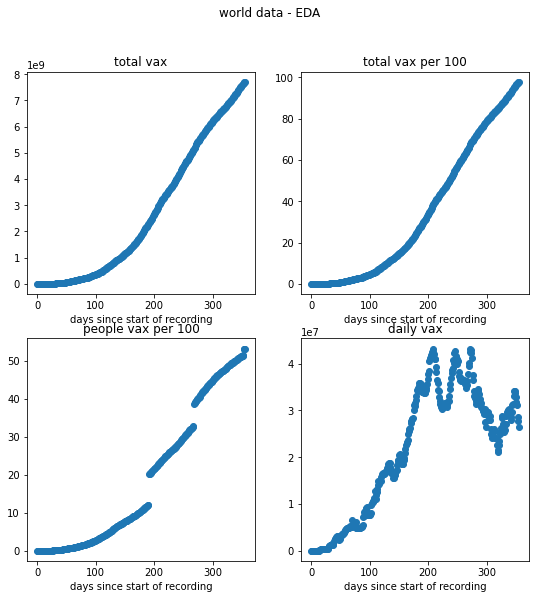

In [13]:
#visual 1: world data on vaccine rates
rows = 2
cols = 2
size = (9, 9)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(rows, cols, figsize = size)

# Plot on ax1
ax1.scatter(world_df['date'],world_df['total_vaccinations'])
ax1.set_title('total vax')
ax1.set_xlabel('days since start of recording')

# Plot on ax2
ax2.scatter(world_df['date'],world_df['total_vaccinations_per_hundred'])
ax2.set_title('total vax per 100')
ax2.set_xlabel('days since start of recording')

# Plot on ax3
ax3.scatter(world_df['date'],world_df['people_vaccinated_per_hundred'])
ax3.set_title('people vax per 100')
ax3.set_xlabel('days since start of recording')

ax4.scatter(world_df['date'],world_df['daily_vaccinations'])
ax4.set_title('daily vax')
ax4.set_xlabel('days since start of recording')

fig.suptitle('world data - EDA')
plt.tight_layout

In [14]:
#create canada df to study this as 1 of 2 countries

canada_df = check_df[check_df['location']=='Canada']

In [15]:
#converted canada df dates to numeric values
for i in canada_df.index:
    x = datetime.datetime.strptime(canada_df['date'][i], '%Y-%m-%d')-datetime.datetime.strptime('2020-12-14', '%Y-%m-%d')
    canada_df['date'][i] = x.days

Text(0.5, 0.98, 'EDA')

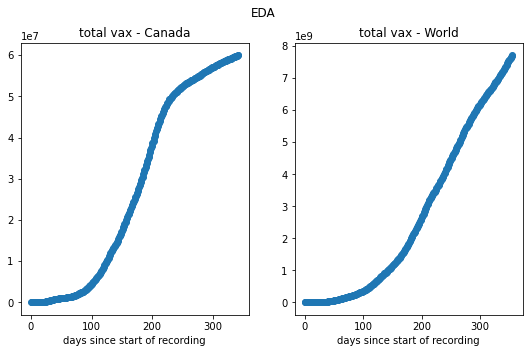

In [16]:
#visual 2: canada vaccine rates (compare against world data)
rows = 1
cols = 2
size = (9, 5)
fig, (ax1, ax2) = plt.subplots(rows, cols, figsize = size)

# Plot on ax1
ax1.scatter(canada_df['date'],canada_df['total_vaccinations'])
ax1.set_title('total vax - Canada')
ax1.set_xlabel('days since start of recording')

# Plot on ax2
ax2.scatter(world_df['date'],world_df['total_vaccinations'])
ax2.set_title('total vax - World')
ax2.set_xlabel('days since start of recording')

fig.suptitle('EDA')
#plt.tight_layout

In [17]:
#visual 3: dfs on different region/countries vaccine rate
can = canada_df['people_fully_vaccinated_per_hundred'].max()
usa = check_df[check_df['location']=='United States']['people_fully_vaccinated_per_hundred'].max()
uk = check_df[check_df['location']=='United Kingdom']['people_fully_vaccinated_per_hundred'].max()
africa = check_df[check_df['location']=='Africa']['people_fully_vaccinated_per_hundred'].max()
Brazil = check_df[check_df['location']=='Brazil']['people_fully_vaccinated_per_hundred'].max()


Text(0, 0.5, 'vax rate per 100')

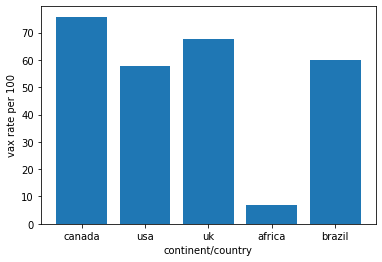

In [18]:
plt.bar(['canada','usa','uk','africa','brazil'],[can,usa,uk,africa,Brazil])
plt.xlabel('continent/country')
plt.ylabel('vax rate per 100')

In [19]:
#check unique locations, seems like income classifications were also included
x = check_df['location']
x.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [20]:
#visual 4: income bracket vs. vaccine rate
high = check_df[check_df['location']=='High income']['people_fully_vaccinated_per_hundred'].max()
upper_mid = check_df[check_df['location']=='Upper middle income']['people_fully_vaccinated_per_hundred'].max()
low_mid = check_df[check_df['location']=='Lower middle income']['people_fully_vaccinated_per_hundred'].max()
low = check_df[check_df['location']=='Low income']['people_fully_vaccinated_per_hundred'].max()


Text(0, 0.5, 'vax rate per 100')

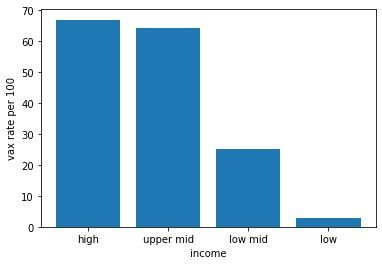

In [21]:
plt.bar(['high','upper mid','low mid','low'],[high,upper_mid,low_mid,low])
plt.xlabel('income')
plt.ylabel('vax rate per 100')

In [22]:
#Create new columns based on distinct values and count them

df = df.sort_values('location')
df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
df['eid'] = df['eid'].cumsum()
ndf=df.loc[df['eid'] == 24]

#check dataframe of Canada
sndf = ndf.sort_values('people_vaccinated_per_hundred')
sndf

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred,eid
6632,Bermuda,BMU,2021-02-15,13155.0,0.0,NaN,NaN,0.0,494.0,21.19,0.00,0.00,NaN,7956.0,300.0,0.483,24
6762,Bermuda,BMU,2021-06-25,78413.0,0.0,NaN,NaN,0.0,141.0,126.29,0.00,0.00,NaN,2271.0,10.0,0.016,24
6766,Bermuda,BMU,2021-06-29,80722.0,0.0,NaN,NaN,0.0,390.0,130.00,0.00,0.00,NaN,6281.0,10.0,0.016,24
6770,Bermuda,BMU,2021-07-03,81845.0,0.0,NaN,NaN,0.0,408.0,131.81,0.00,0.00,NaN,6571.0,10.0,0.016,24
6646,Bermuda,BMU,2021-03-01,21387.0,0.0,NaN,NaN,0.0,616.0,34.44,0.00,0.00,NaN,9921.0,310.0,0.499,24
6596,Bermuda,BMU,2021-01-10,0.0,0.0,NaN,NaN,0.0,0.0,0.00,0.00,0.00,NaN,0.0,NaN,NaN,24
6602,Bermuda,BMU,2021-01-16,1665.0,1665.0,NaN,NaN,0.0,278.0,2.68,2.68,0.00,NaN,4477.0,278.0,0.448,24
6609,Bermuda,BMU,2021-01-23,2932.0,2932.0,NaN,NaN,0.0,181.0,4.72,4.72,0.00,NaN,2915.0,181.0,0.292,24
6616,Bermuda,BMU,2021-01-30,4897.0,4897.0,NaN,NaN,0.0,281.0,7.89,7.89,0.00,NaN,4526.0,281.0,0.453,24
6623,Bermuda,BMU,2021-02-06,9095.0,7504.0,1591.0,NaN,0.0,600.0,14.65,12.09,2.56,NaN,9663.0,372.0,0.599,24


In [23]:
#create df val of vax data

val = sndf['people_vaccinated_per_hundred'].values

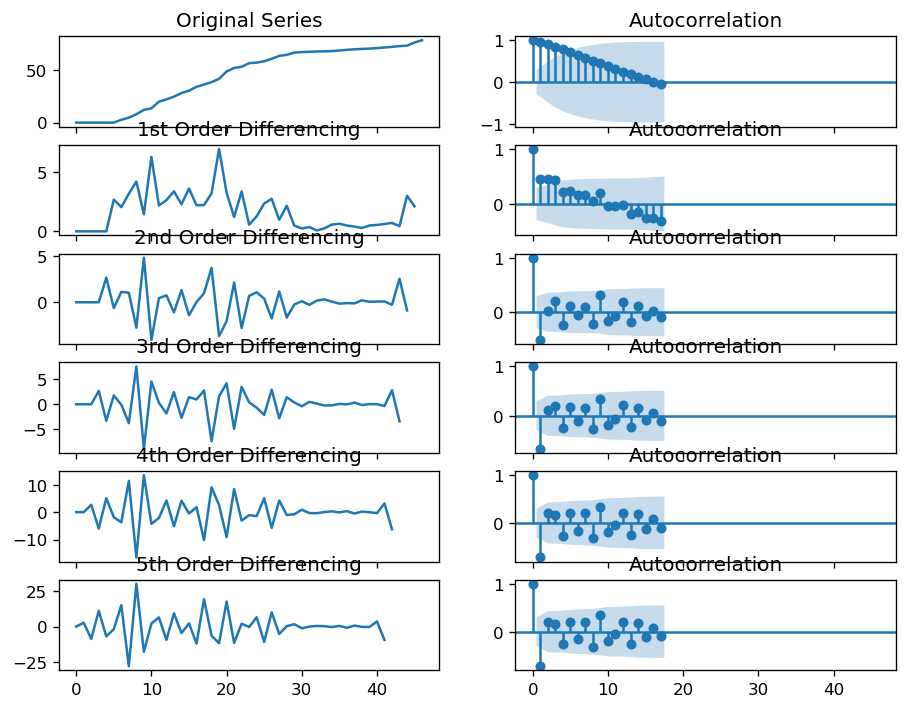

In [24]:
#study what degree of differentiation we should use for arima model

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(val,2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(np.diff(val,3)); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(np.diff(np.diff(diffval)), ax=axes[3, 1])

# 4th Differencing
axes[4, 0].plot(np.diff(val,4)); axes[4, 0].set_title('4th Order Differencing')
plot_acf(np.diff(np.diff(np.diff(diffval))), ax=axes[4, 1])

# 4th Differencing
axes[5, 0].plot(np.diff(val,5)); axes[5, 0].set_title('5th Order Differencing')
plot_acf(np.diff(np.diff(np.diff(diffval))), ax=axes[5, 1])
plt.show()

In [25]:
#no improvement after 2nd order differnce

In [26]:
!pip install pmdarima

You should consider upgrading via the '/Users/zach/opt/anaconda3/envs/ml_course/bin/python -m pip install --upgrade pip' command.


**p**: The number of lag observations included in the model, also called the lag order.

**d**: The number of times that the raw observations are differenced, also called the degree of differencing.

**q**: The size of the moving average window, also called the order of moving average.

In [27]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [28]:
#code borrowed and adapted from TA tutorial in MIE1624
#Create new columns based on distinct values and count them and plot differentiation and autocorrelation values

#df = df.sort_values('location')
def p3_1(count):
    df['eid'] = (df.groupby(['location']).cumcount()==0).astype(int)
    df['eid'] = df['eid'].cumsum()
    ndf=df.loc[df['eid'] == count]

    #check dataframe of Canada
    sndf = ndf.sort_values('total_vaccinations')

    val = sndf['total_vaccinations'].values


    plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

    # Original Series
    fig, axes = plt.subplots(6, 2, sharex=True)
    axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
    plot_acf(val, ax=axes[0, 1])

    # 1st Differencing
    axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
    plot_acf(np.diff(val), ax=axes[1, 1])
    #diffval = np.diff(val)

    # 2nd Differencing
    axes[2, 0].plot(np.diff(val,2)); axes[2, 0].set_title('2nd Order Differencing')
    plot_acf(np.diff(diffval), ax=axes[2, 1])

    # 3rd Differencing
    axes[3, 0].plot(np.diff(val,3)); axes[3, 0].set_title('3rd Order Differencing')
    plot_acf(np.diff(np.diff(diffval)), ax=axes[3, 1])

    # 4th Differencing
    axes[4, 0].plot(np.diff(val,4)); axes[4, 0].set_title('4th Order Differencing')
    plot_acf(np.diff(np.diff(np.diff(diffval))), ax=axes[4, 1])

    # 4th Differencing
    axes[5, 0].plot(np.diff(val,5)); axes[5, 0].set_title('5th Order Differencing')
    plot_acf(np.diff(np.diff(np.diff(diffval))), ax=axes[5, 1])
    plt.show()
    
    return val

In [29]:
#use auto_arima function to determine ideal p,d,q value. adjusted alpha value for better modeling
def p3_2(valer):
    model = pm.auto_arima(valer, start_p=1, start_q=1,
    #test='adf', # use adftest to find optimal 'd'
    max_p=6, max_q=6, # maximum p and q
    m=1, # frequency of series
    d=2,
    seasonal=True, # No Seasonality
    start_P=0, max_P=5,
    start_D=0, max_D=5,
    start_Q=0, max_Q=5,
    max_order = 15,
    trace=True, 

    alpha = 0.005,

    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)
    print(model.summary())

    model.plot_diagnostics(figsize=(7,7))
    plt.tight_layout
    plt.show()
    return model

In [30]:
# Forecast to next 50 days and plot the results
def p3_3(m1,val,a):
    n_periods = 50
    fc, confint = m1.predict(n_periods=n_periods, return_conf_int=True,alpha=a)
    index_of_fc = np.arange(len(val), len(val)+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.plot(val)
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index,
    lower_series,
    upper_series,
    color='b', alpha=.15)
    plt.title("Forecast of Vaccination Rate")
    plt.show()
    return lower_series,upper_series

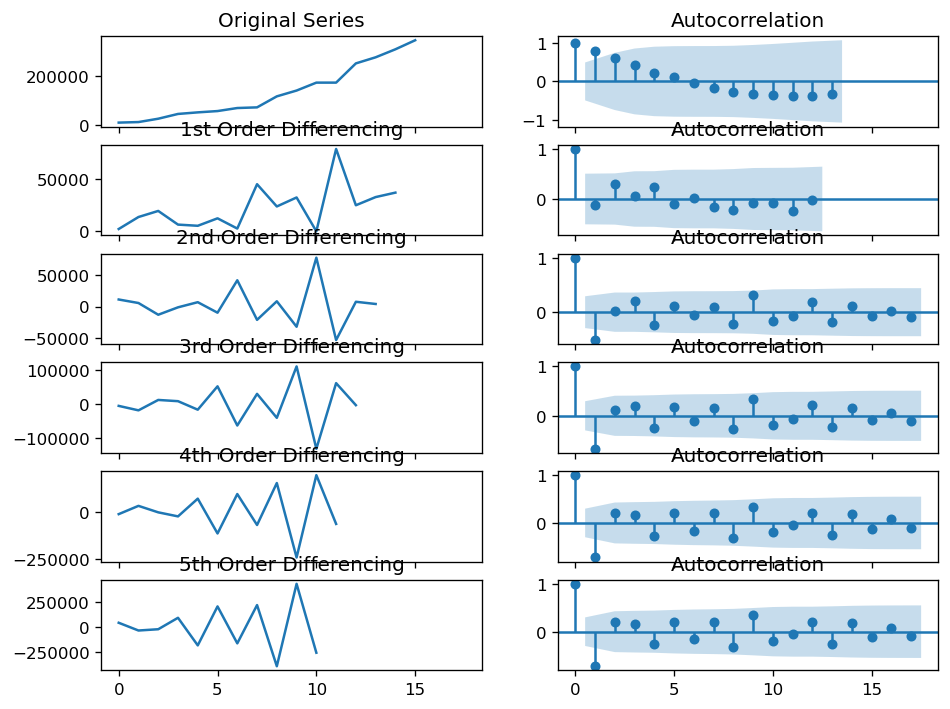

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=322.678, Time=0.60 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=330.919, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=323.452, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=323.401, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=324.305, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=323.805, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=321.884, Time=0.01 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.914 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   16
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -157.942
Date:

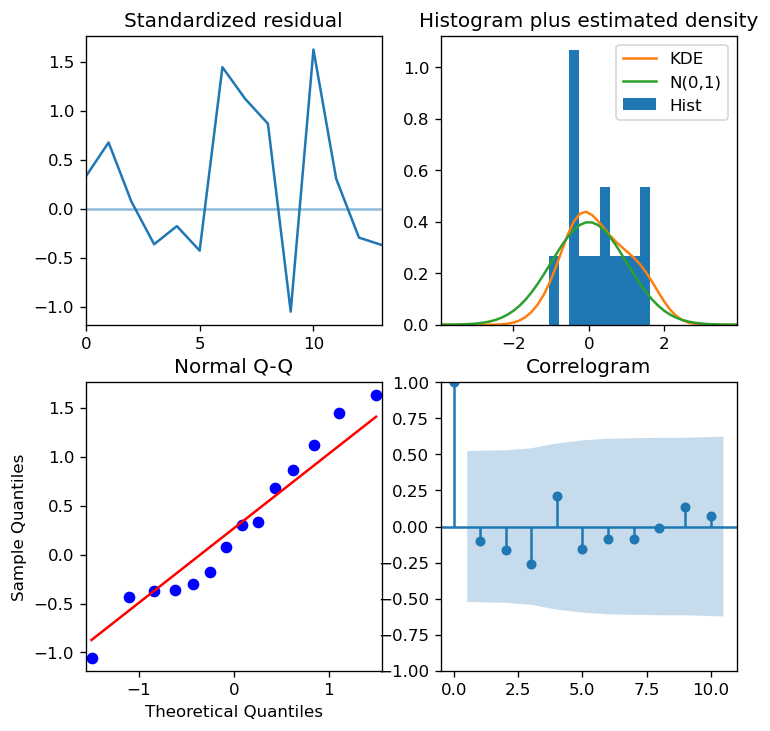

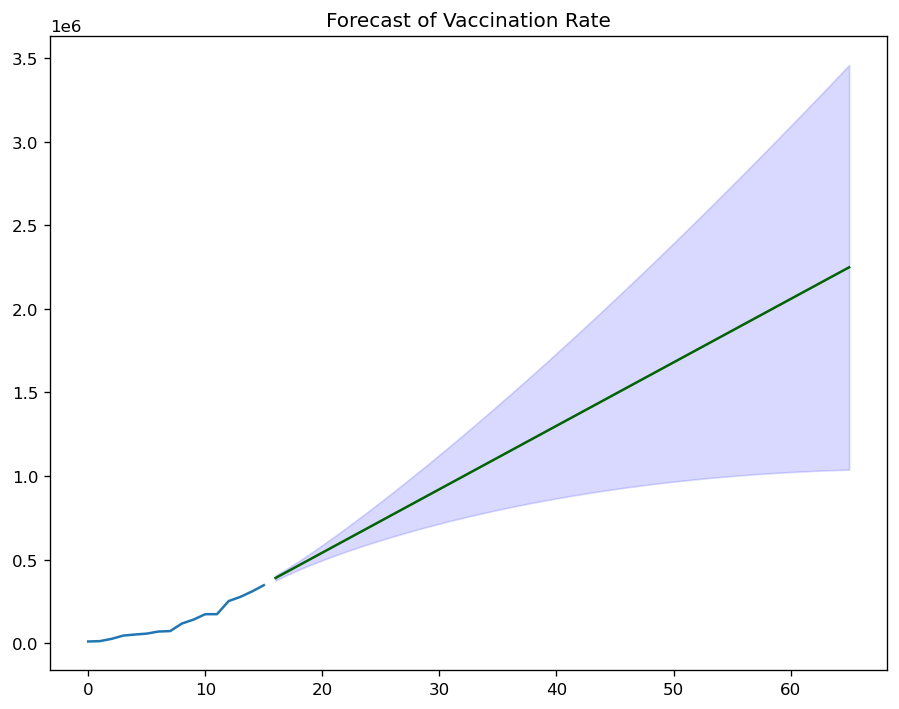

In [31]:
#get forecasts for num==24 (see below to get country name)
v = p3_1(23)
m1 = p3_2(v)
x3,x4 = p3_3(m1,v,0.5)

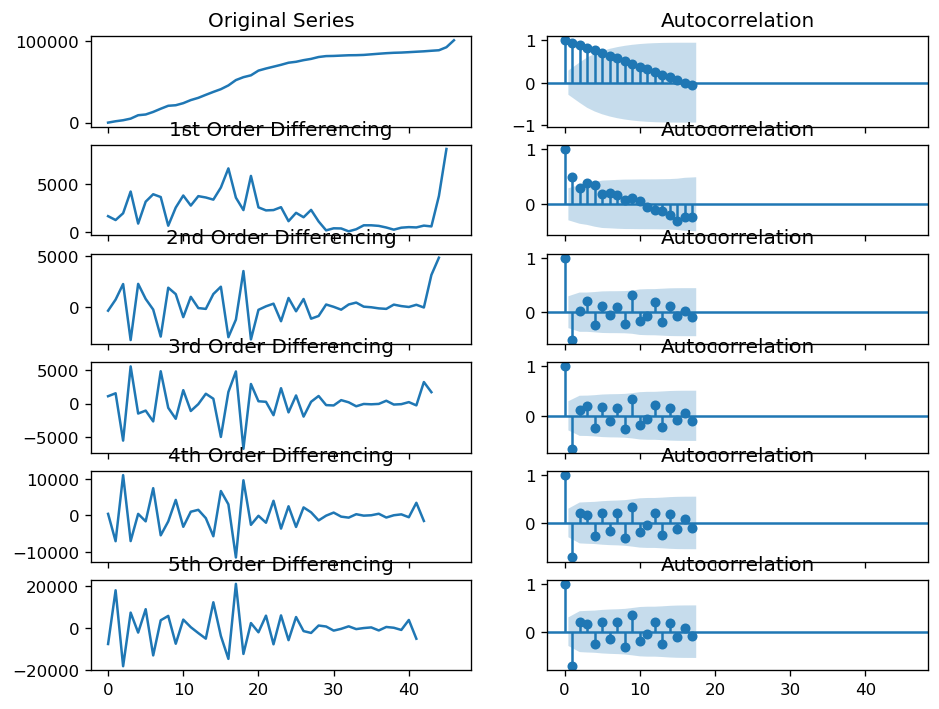

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=795.123, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=794.220, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=794.667, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=793.333, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=794.631, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=796.146, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=794.720, Time=0.02 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.129 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -394.666
Date:                Wed, 08 Dec 2021   AIC                            793.333
Time:                        17:31:04   BIC                            796.946
Sample:                       

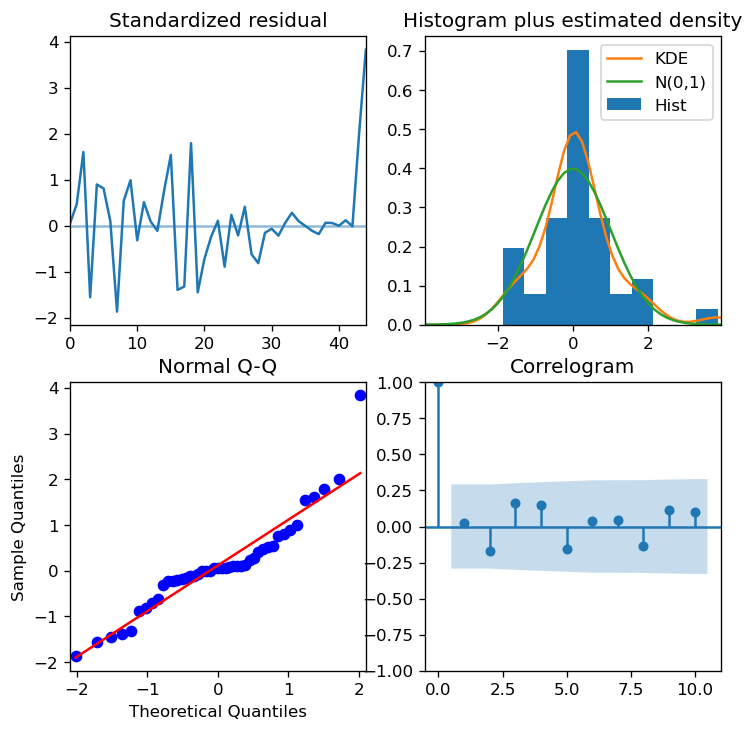

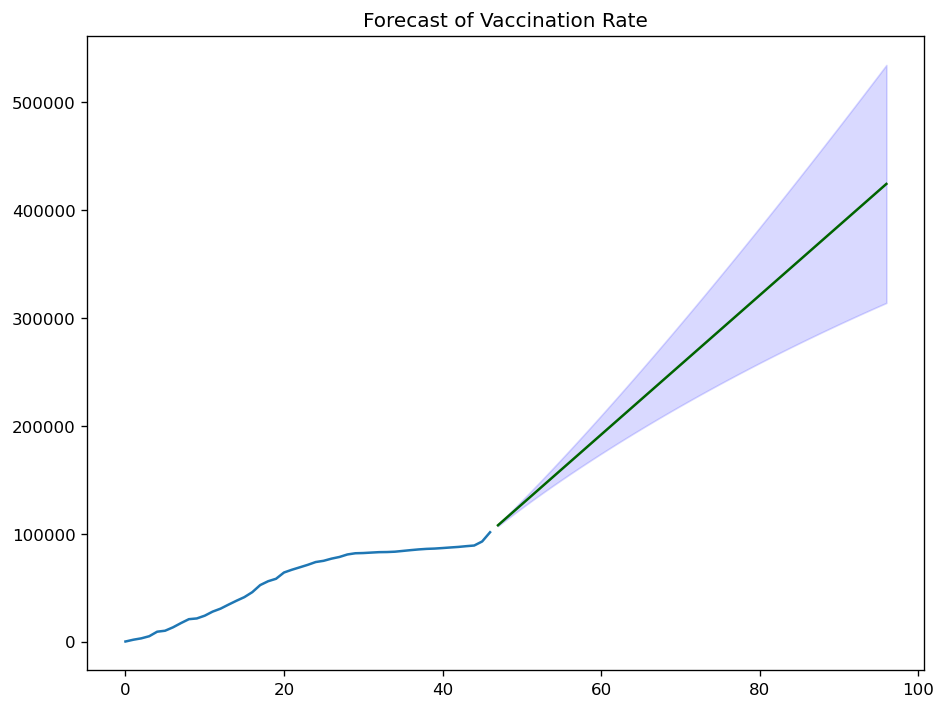

In [32]:
#get forecasts for num==24 (see below to get country name)
v = p3_1(24)
m1 = p3_2(v)
x1,x2 = p3_3(m1,v,0.6)

In [33]:
#print best and worst case forecasts along with mid possiblity
xdf=df.loc[df['eid'] == 24]

print('for ' + str(xdf['location'].value_counts().index[0]) + ':')
x1 = np.array(x1)
print('worst case scenario : ' + str(int(x1[-1]-x1[0])) + ' people get vaccinated in next 50 days')
x2 = np.array(x2)
print('best case scenario : ' + str(int(x2[-1]-x2[0])) + ' people get vaccinated in next 50 days')
xx2 = (x1+x2)/2
print('mid case scenario : ' + str(int(xx2[-1]-xx2[0])) + ' people get vaccinated in next 50 days')


for Bermuda:
worst case scenario : 207062 people get vaccinated in next 50 days
best case scenario : 426113 people get vaccinated in next 50 days
mid case scenario : 316587 people get vaccinated in next 50 days


In [34]:
xdf=df.loc[df['eid'] == 23]

print('for ' + str(xdf['location'].value_counts().index[0]) + ':')
x3 = np.array(x3)
print('worst case scenario : ' + str(int(x3[-1]-x3[0])) + ' people get vaccinated in next 50 days')
x4 = np.array(x4)
print('best case scenario : ' + str(int(x4[-1]-x4[0])) + ' people get vaccinated in next 50 days')
xx3 = (x3+x4)/2
print('mid case scenario : ' + str(int(xx3[-1]-xx3[0])) + ' people get vaccinated in next 50 days')


for Benin:
worst case scenario : 663301 people get vaccinated in next 50 days
best case scenario : 3053062 people get vaccinated in next 50 days
mid case scenario : 1858181 people get vaccinated in next 50 days


In [35]:
#part 3: get Canada and US datasets from part 1/2
canada_df = check_df[check_df['location']=='Canada']
usa_df = check_df[check_df['location']=='United States']

In [36]:
#import second dataset and visualize

new_data = pd.read_csv('covid19-canda.csv')

can_df = new_data[new_data['prname']=='Canada']
print(can_df.shape)
can_df.head()

(652, 40)


,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,1,Canada,Canada,2020-02-08,NaN,7,0.0,0.0,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
8,1,Canada,Canada,2020-02-16,NaN,8,0.0,0.0,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11,1,Canada,Canada,2020-02-21,NaN,9,0.0,0.0,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,1,Canada,Canada,2020-02-24,NaN,10,0.0,0.0,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [37]:
#get canada dataset in timespan of first dataset

canada = can_df[['date','numconf','numdeaths']]
canada = canada.iloc[0:-1]
#canada = 
canada = canada.iloc[294:637]

In [38]:
#make sure datasets are same dimension

print(canada.shape,canada_df.shape)

(343, 3) (343, 16)


In [39]:
#check to see if any dates in 1 set but not the other

date1 = np.array(canada['date'])
date2 = np.array(canada_df['date'])

g= 0
for i in range(date1.shape[0]):
    if date1[i] not in date2:
        print(date1[i])
        g+= 1
print(str(g) + ' dates not in both datasets')

0 dates not in both datasets


In [40]:
#import 3rd dataset for USA data on cases and deaths

new_data2 = pd.read_csv('usa_owid-covid-data.csv')
new_data2 = new_data2[new_data2['location']=='United States']
usa = new_data2[['date','total_cases','total_deaths']]
print(new_data2.shape)
usa.head()

(685, 67)


,date,total_cases,total_deaths
130487,2020-01-22,1.0,NaN
130488,2020-01-23,1.0,NaN
130489,2020-01-24,2.0,NaN
130490,2020-01-25,2.0,NaN
130491,2020-01-26,5.0,NaN


In [41]:
print(usa.shape,usa_df.shape)

(685, 3) (344, 16)


In [42]:
#retrieve data within dates of first dataset
usa = usa.iloc[326:670]

In [43]:
#make sure datasets are same date

date1 = np.array(usa['date']) #bigger
date2 = np.array(usa_df['date'])

g= 0
for i in range(date1.shape[0]):
    if date1[i] not in date2:
        print(date1[i])
        g+= 1
print(str(g) + ' dates not in both datasets')

0 dates not in both datasets


In [44]:
#create df of vaccinations data for canada/usa

usa_vac = usa_df['total_vaccinations']
canada_vac = canada_df['total_vaccinations']

In [45]:
#concatenate dfs to work with

x = pd.merge(canada, canada_df, on='date', how='outer')
canada_total = x[['date','numdeaths','numconf','total_vaccinations']]

In [46]:
x = pd.merge(usa, usa_df, on='date', how='outer')
usa_total = x[['date','total_cases','total_deaths','total_vaccinations']]

In [47]:
#plot correlation of data
canada_corr = canada_total.drop(columns=['date'])
canada_corr.head()

,numdeaths,numconf,total_vaccinations
0,13593.0,468860,5.0
1,13705.0,475212,727.0
2,13845.0,481628,3016.0
3,13962.0,488636,7267.0
4,14086.0,495343,11276.0


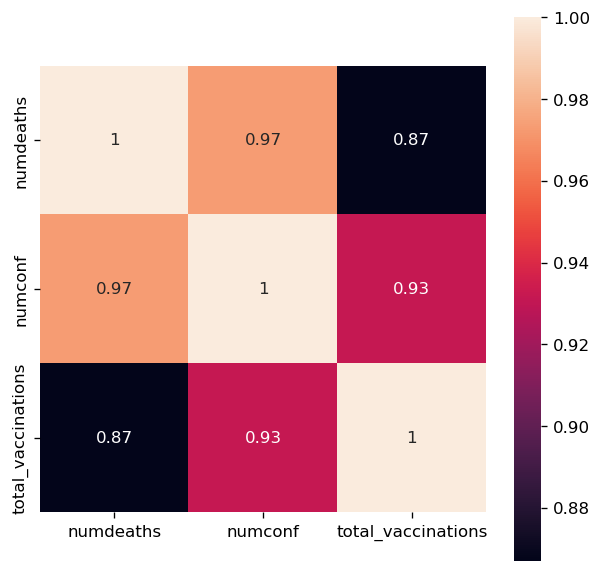

In [48]:
plt.subplots(figsize=(6, 6))
sns.heatmap(canada_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

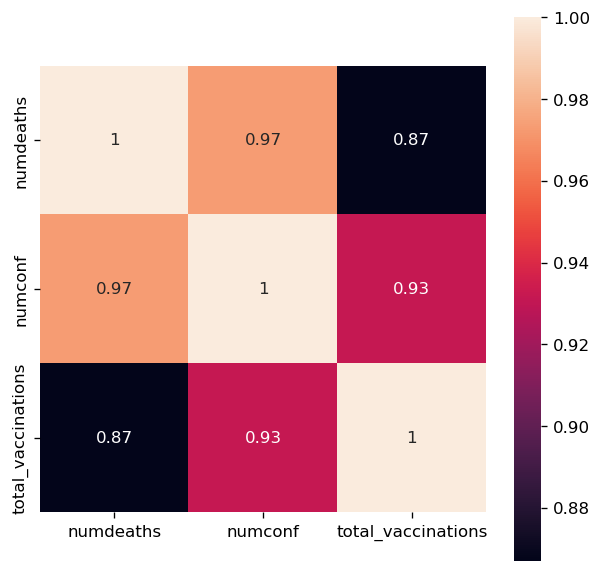

In [49]:
plt.subplots(figsize=(6, 6))
sns.heatmap(canada_corr.corr(), annot=True, square=True)
canada_corr = canada_corr.iloc[0:200]
#plt.tight_layout()
plt.show()

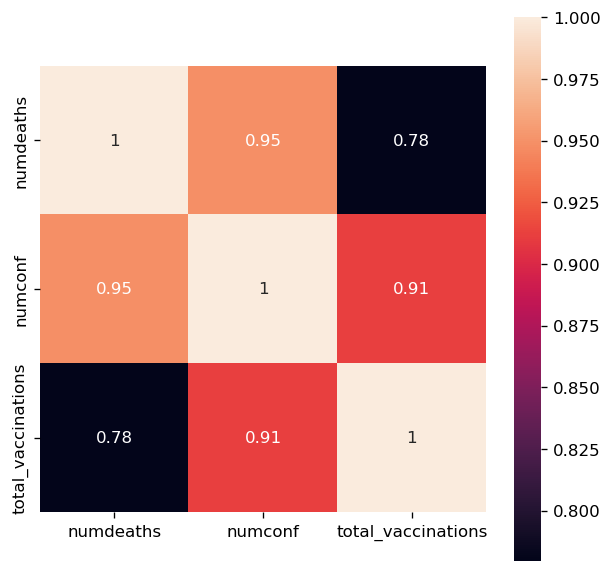

In [50]:
plt.subplots(figsize=(6, 6))
sns.heatmap(canada_corr.corr(), annot=True, square=True)
canada_corr = canada_corr.iloc[200:344]
#plt.tight_layout()
plt.show()

stronger correlations if you consider season modules and split the data ^

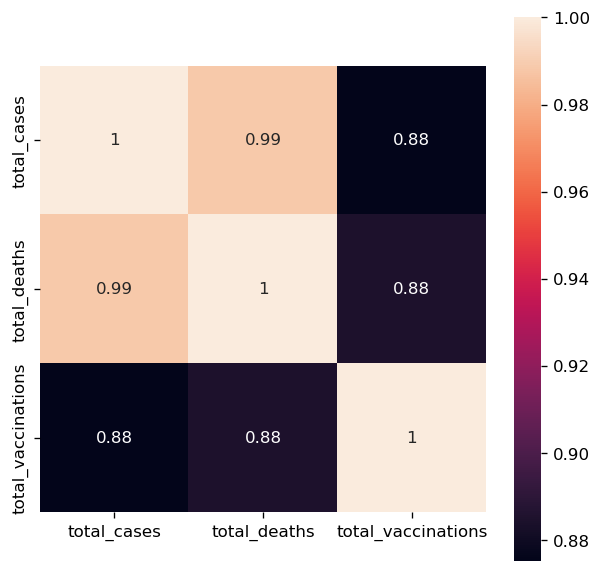

In [52]:
#do same corelation for USA:

usa_corr = usa_total.drop(columns=['date'])
usa_corr = usa_corr.iloc[100:344]
plt.subplots(figsize=(6, 6))
sns.heatmap(usa_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

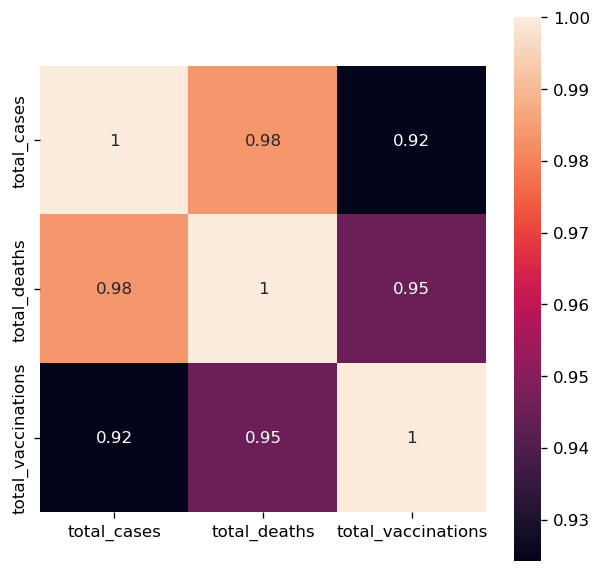

In [53]:
usa_corr = usa_total.drop(columns=['date'])

plt.subplots(figsize=(6, 6))
sns.heatmap(usa_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

In [54]:
usa_corr.shape

(344, 3)

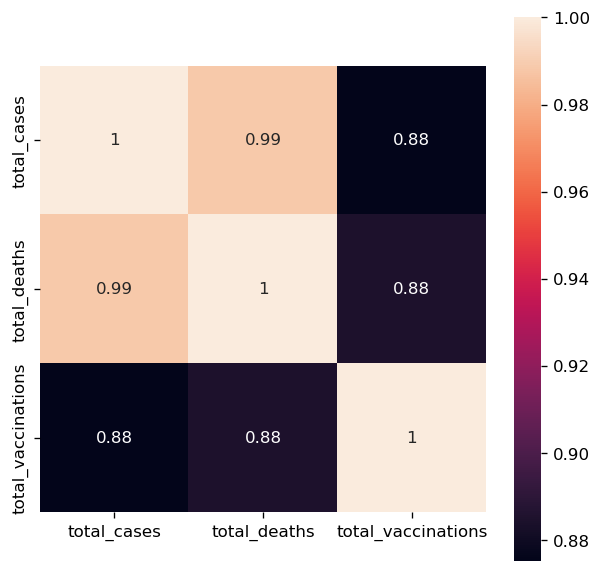

In [55]:
usa_corr = usa_total.drop(columns=['date'])
usa_corr = usa_corr.iloc[100:344]
plt.subplots(figsize=(6, 6))
sns.heatmap(usa_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

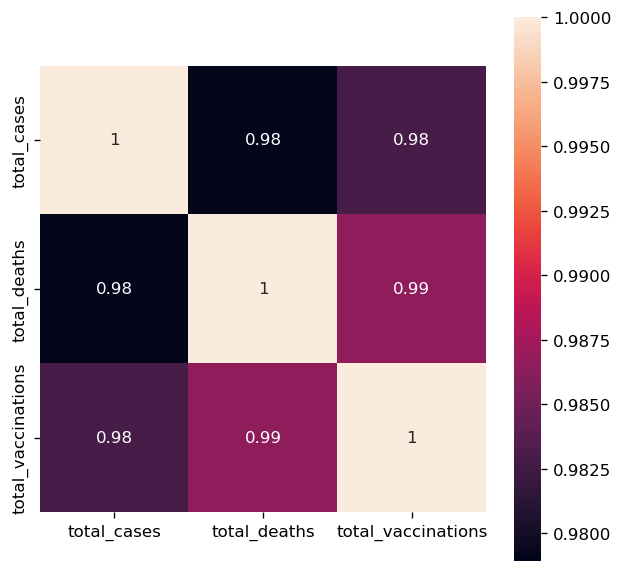

In [56]:
usa_corr = usa_total.drop(columns=['date'])
usa_corr = usa_corr.iloc[200:344]
plt.subplots(figsize=(6, 6))
sns.heatmap(usa_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

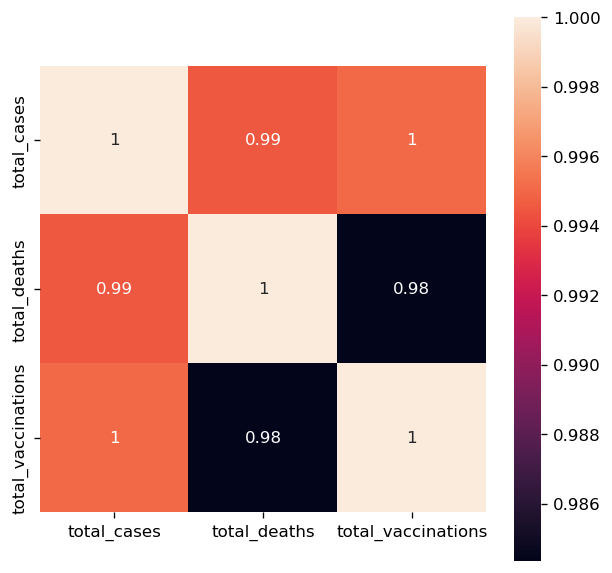

In [57]:
usa_corr = usa_total.drop(columns=['date'])
usa_corr = usa_corr.iloc[300:344]
plt.subplots(figsize=(6, 6))
sns.heatmap(usa_corr.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

same conclusion for USA data as well ^

In [58]:
from scipy import stats

In [59]:
#based on this website, need to have linear relationship between variables so must analyze segments of the graph
#https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/

Text(0.5, 0.98, 'canada')

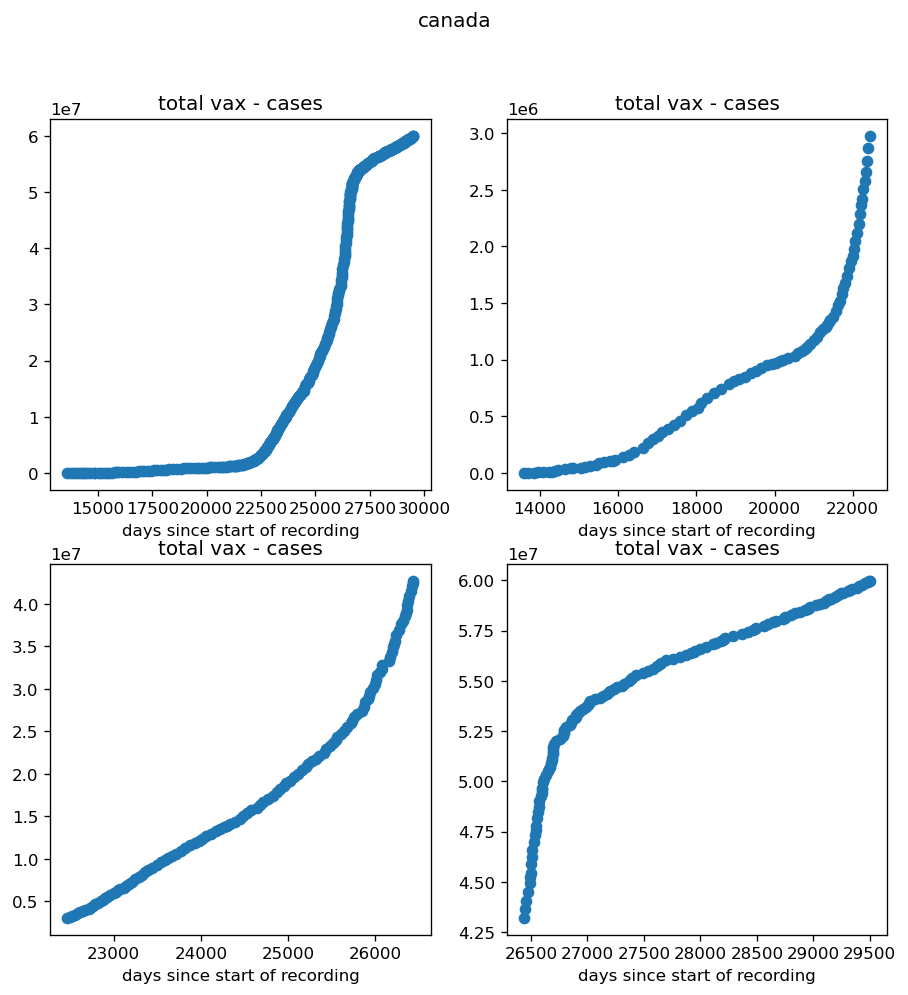

In [60]:
#visualize different segement of the covid data. conclusion is not linear enough for pearson correlation

rows = 2
cols = 2
size = (9, 9)
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(rows, cols, figsize = size)

# Plot on ax1
ax1.scatter(canada_total['numdeaths'],canada_total['total_vaccinations'])
ax1.set_title('total vax - cases')
ax1.set_xlabel('days since start of recording')

# Plot on ax2
ax2.scatter(canada_total['numdeaths'].iloc[:90],canada_total['total_vaccinations'].iloc[:90])
ax2.set_title('total vax - cases')
ax2.set_xlabel('days since start of recording')

ax3.scatter(canada_total['numdeaths'].iloc[90:210],canada_total['total_vaccinations'].iloc[90:210])
ax3.set_title('total vax - cases')
ax3.set_xlabel('days since start of recording')

ax4.scatter(canada_total['numdeaths'].iloc[210:],canada_total['total_vaccinations'].iloc[210:])
ax4.set_title('total vax - cases')
ax4.set_xlabel('days since start of recording')

fig.suptitle('canada')
#plt.tight_layout

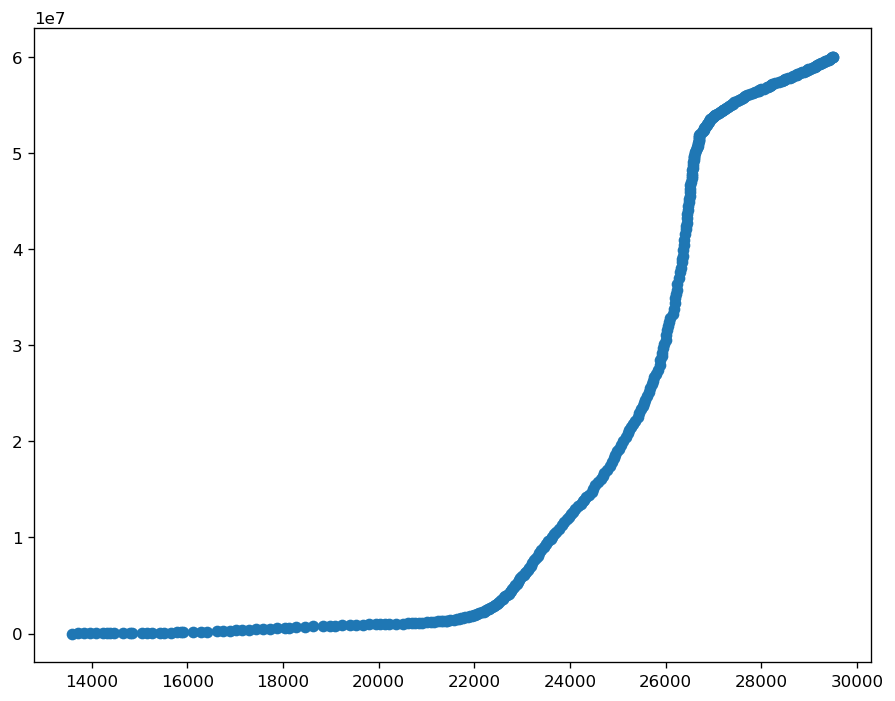

In [61]:
plt.scatter(canada_total['numdeaths'],canada_total['total_vaccinations'])

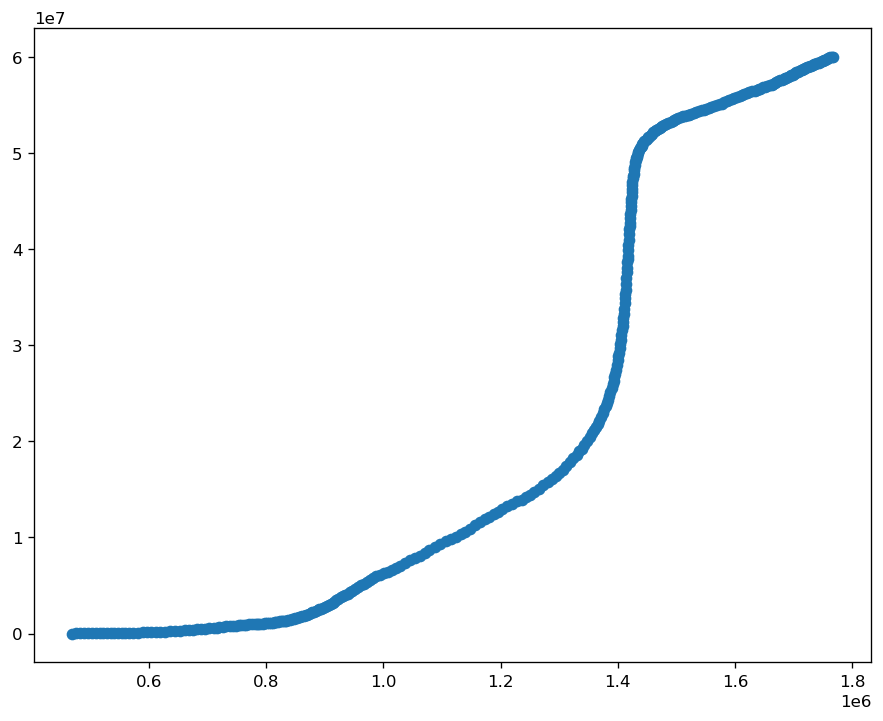

In [62]:
plt.scatter(canada_total['numconf'],canada_total['total_vaccinations'])

In [63]:
stats.pearsonr(canada_total['numconf'],canada_total['total_vaccinations'])

(0.9317232020075595, 4.60194614247525e-152)

In [64]:
#data not linear enough, have to use kendall correlation which doesnt requre linearity
#use kendall correlation:

In [65]:
stats.kendalltau(canada_total['numconf'],canada_total['total_vaccinations'])

KendalltauResult(correlation=1.0, pvalue=0.0)

In [66]:
stats.kendalltau(canada_total['numdeaths'],canada_total['total_vaccinations'])

KendalltauResult(correlation=0.9999914752505209, pvalue=3.799712410302529e-168)

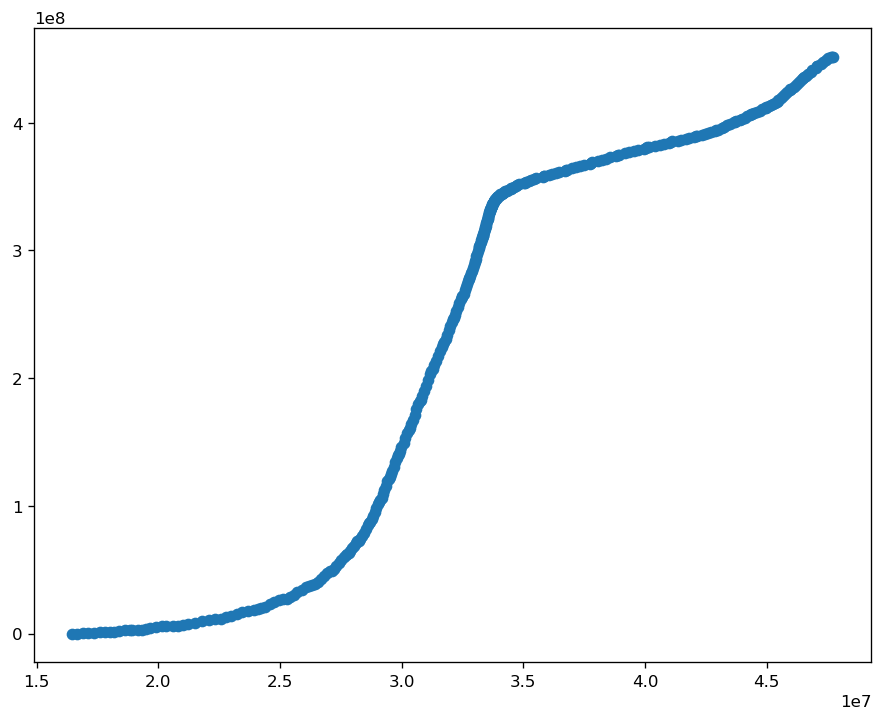

In [67]:
plt.scatter(usa_total['total_cases'],usa_total['total_vaccinations'])
#linear enough to do pearson correlation 

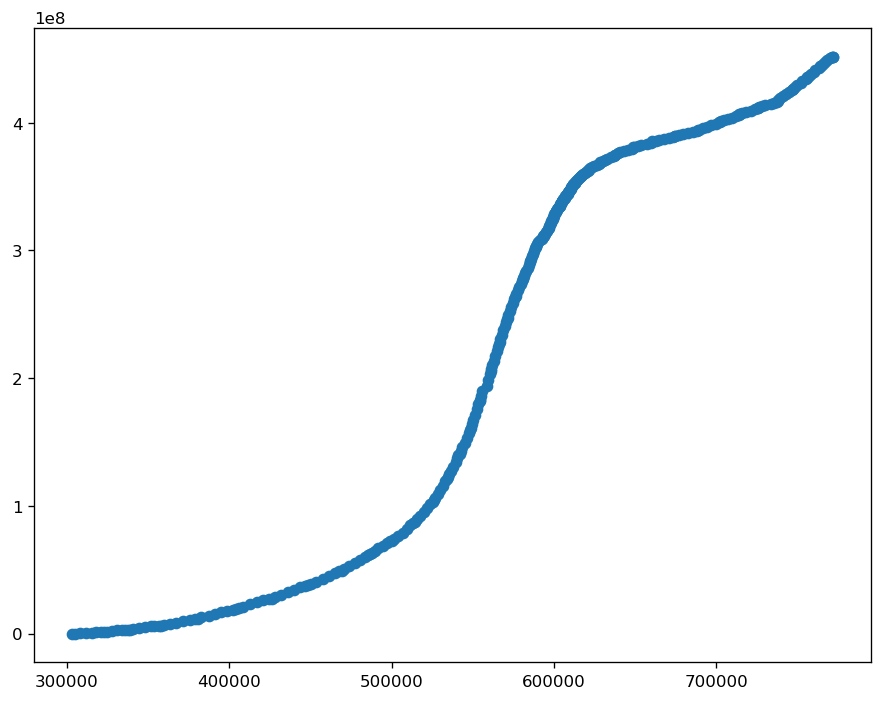

In [68]:
plt.scatter(usa_total['total_deaths'],usa_total['total_vaccinations'])
#linear enough to do pearson correlation 

In [69]:
#pearson and kendall correlation 

stats.pearsonr(usa_total['total_cases'],usa_total['total_vaccinations'])

(0.92423469711433, 4.636276737209798e-145)

In [70]:
stats.pearsonr(usa_total['total_deaths'],usa_total['total_vaccinations'])

(0.945056528210094, 3.9089898584873584e-168)

In [71]:
stats.kendalltau(usa_total['total_cases'],usa_total['total_vaccinations'])

KendalltauResult(correlation=0.999991524813228, pvalue=1.2318336823254213e-168)

In [72]:
stats.pearsonr(usa_total['total_deaths'],usa_total['total_vaccinations'])

(0.945056528210094, 3.9089898584873584e-168)

In [73]:
usa2 = usa_total.copy(deep=True)
canada2 = canada_total.copy(deep=True)

In [74]:
usa2.head()

,date,total_cases,total_deaths,total_vaccinations
0,2020-12-13,16472103.0,303465.0,21800.0
1,2020-12-14,16672734.0,305114.0,26124.0
2,2020-12-15,16894785.0,308101.0,74833.0
3,2020-12-16,17135476.0,311834.0,233645.0
4,2020-12-17,17372704.0,315284.0,504183.0


In [75]:
#look at correlation of daily cases/deaths/vaccinations
for i in range(usa2.shape[0]-1):
    usa2['total_cases'].iloc[i] = usa2['total_cases'].iloc[i+1]-usa2['total_cases'].iloc[i]
    usa2['total_deaths'].iloc[i] = usa2['total_deaths'].iloc[i+1]-usa2['total_deaths'].iloc[i]
    usa2['total_vaccinations'].iloc[i] = usa2['total_vaccinations'].iloc[i+1]-usa2['total_vaccinations'].iloc[i]


In [76]:
for i in range(canada2.shape[0]-1):
    canada2['numconf'].iloc[i] = canada2['numconf'].iloc[i+1]-canada2['numconf'].iloc[i]
    canada2['numdeaths'].iloc[i] = canada2['numdeaths'].iloc[i+1]-canada2['numdeaths'].iloc[i]
    canada2['total_vaccinations'].iloc[i] = canada2['total_vaccinations'].iloc[i+1]-canada2['total_vaccinations'].iloc[i]

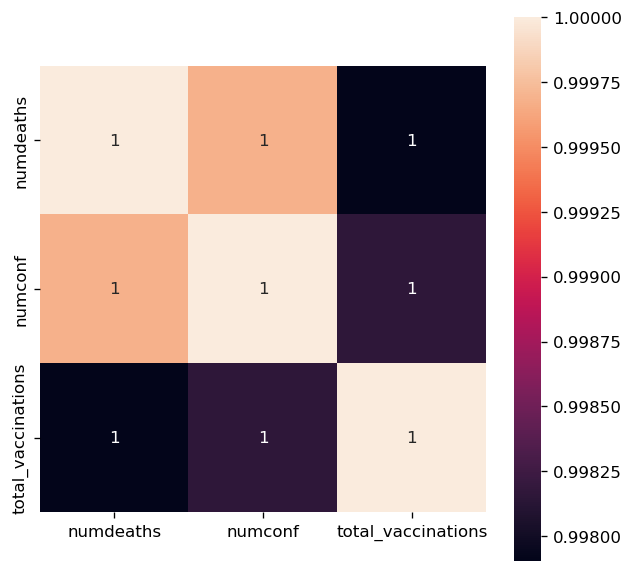

In [77]:
plt.subplots(figsize=(6, 6))
sns.heatmap(canada2.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

In [78]:
#very strong correlation for daily data

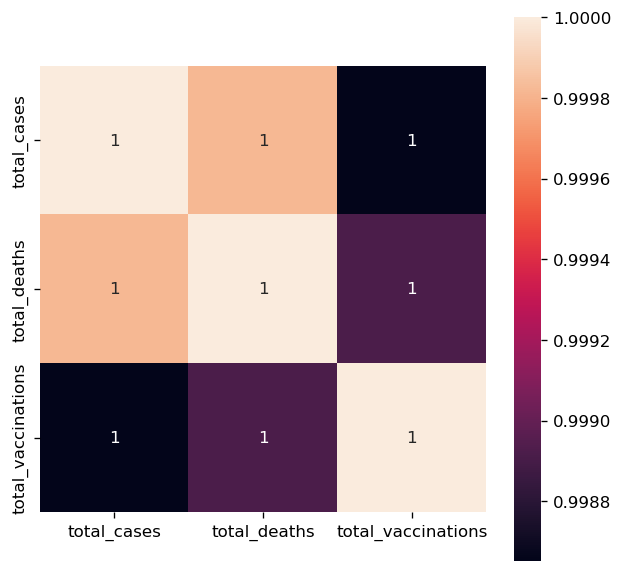

In [79]:
plt.subplots(figsize=(6, 6))
sns.heatmap(usa2.corr(), annot=True, square=True)
#plt.tight_layout()
plt.show()

In [80]:
#strong correlations

In [81]:
#part 5 - conclusions

canada is better at vaccinating than USA. larger overall percentage and total cases and deaths contributes to vaccine rates. This likely due to fear of catching covid. Canada had most effective vaccination in terms of vaccinations per 100. 

A discovery that was made is the triple phase curve of vaccines. The first phase is the ramp up where demand outweighs supply. The second phase is where supply meets demand and vaccination rates skyrocket. The last phase is where supply is greater than demand and vaccine rates slow. 